In [1]:
# Import the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split from sklearn

In [2]:
# Import the dataset
df = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx')

In [3]:
# View the dataset
df.head(2010)

,Role_Test,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
0,1,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,5,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,2006,0.36,0.95,3,206,4,0,0,sales,low,0
2006,2007,2007,0.54,0.37,2,176,2,0,0,sales,low,0
2007,2008,2008,0.99,0.91,5,136,4,0,0,sales,low,0
2008,2009,2009,0.50,0.75,6,127,3,0,0,sales,low,0


In [4]:
# Get to know the content of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
Role_Test                14999 non-null int64
Emp ID                   14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 1.4+ MB


In [5]:
#Know the count, mean, standard deviation, minimum, 25%, 50%, 75% and maximum value of the dataset
df.describe()

,Role_Test,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### We are focused on the left column

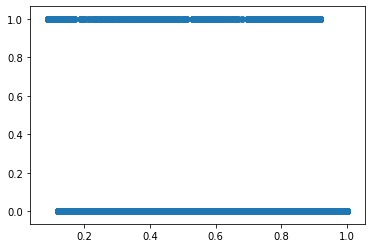

In [6]:
plt. scatter(df.satisfaction_level, df.left)

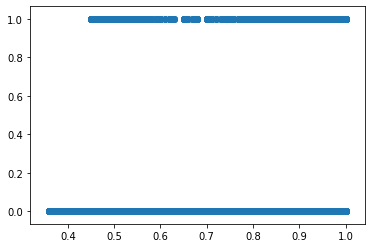

In [7]:
plt. scatter(df.last_evaluation, df.left)

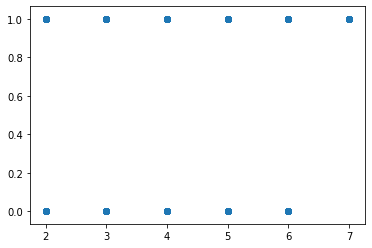

In [8]:
plt. scatter(df.number_project, df.left)

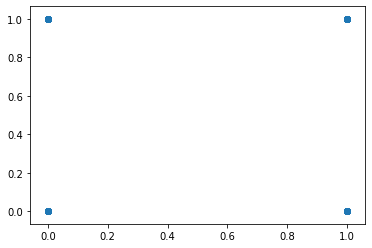

In [9]:
plt.scatter(df.Work_accident, df.left)

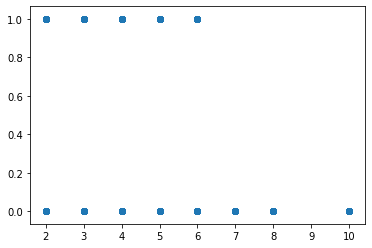

In [10]:
plt. scatter(df.time_spend_company, df.left)

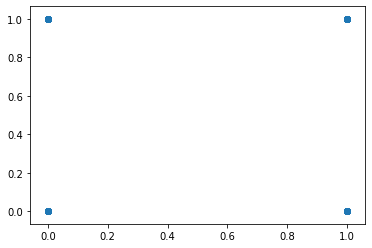

In [11]:
plt. scatter(df.promotion_last_5years, df.left)

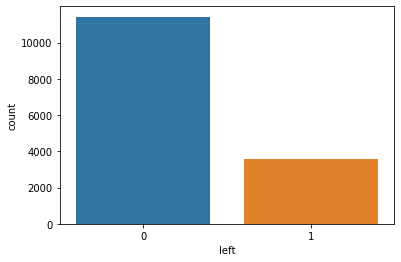

In [12]:
sns.countplot(df['left'])

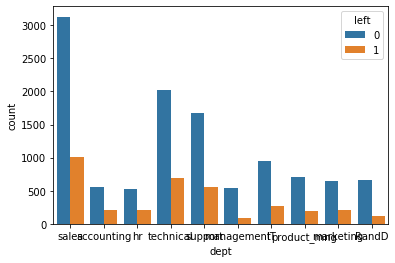

In [13]:
sns.countplot(df['dept'], hue=df['left'])

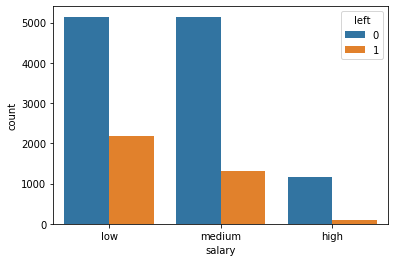

In [14]:
sns.countplot(df['salary'], hue=df['left'])

In [15]:
department = pd.get_dummies(df.dept)

In [16]:
department.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [17]:
salary = pd.get_dummies(df.salary)

In [18]:
salary.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [19]:
df = df.drop('dept', axis=1)
df = df.join(department)
df.head(5)

,Role_Test,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,1,1,0.38,0.53,2,157,3,0,0,low,...,0,0,0,0,0,0,0,1,0,0
1,2,2,0.80,0.86,5,262,6,0,0,medium,...,0,0,0,0,0,0,0,1,0,0
2,3,3,0.11,0.88,7,272,4,0,0,medium,...,0,0,0,0,0,0,0,1,0,0
3,4,4,0.72,0.87,5,223,5,0,0,low,...,0,0,0,0,0,0,0,1,0,0
4,5,5,0.37,0.52,2,159,3,0,0,low,...,0,0,0,0,0,0,0,1,0,0


In [20]:
x = df.drop("left", axis=1)
y = df.left

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=23)